# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [26]:
weather_api_key

'845ecb920cb4e0df16aec9c424da18ef'

### Generate the Cities List by Using the `citipy` Library

In [28]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [32]:
# Set the API base URL

url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"] 
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"] 
        city_wind = city_weather["wind"]["speed"] 
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"] 

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | hithadhoo
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | necochea
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | edgewater
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | guerrero negro
Processing Record 10 of Set 1 | arraial do cabo
Processing Record 11 of Set 1 | bafra
Processing Record 12 of Set 1 | saint george
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | leningradskiy
Processing Record 15 of Set 1 | san andres
Processing Record 16 of Set 1 | parati
Processing Record 17 of Set 1 | ndago
Processing Record 18 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 1 | komsomolskiy
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | sao filipe
Processing

Processing Record 38 of Set 4 | qorveh
Processing Record 39 of Set 4 | ahipara
Processing Record 40 of Set 4 | waycross
Processing Record 41 of Set 4 | arica
Processing Record 42 of Set 4 | bafoussam
Processing Record 43 of Set 4 | deputatskiy
Processing Record 44 of Set 4 | mangan
Processing Record 45 of Set 4 | butaritari
Processing Record 46 of Set 4 | sao joao da barra
Processing Record 47 of Set 4 | klyuchevsk
Processing Record 48 of Set 4 | ostrovnoy
Processing Record 49 of Set 4 | kamensk-uralskiy
Processing Record 0 of Set 5 | norman wells
Processing Record 1 of Set 5 | camana
Processing Record 2 of Set 5 | san carlos del zulia
Processing Record 3 of Set 5 | srednekolymsk
Processing Record 4 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 5 of Set 5 | port alfred
Processing Record 6 of Set 5 | ponta do sol
Processing Record 7 of Set 5 | zambezi
Processing Record 8 of Set 5 | taranagar
Processing Record 9 of Set 5 | hit
Processing Record 10 of Set 5 | we
Ci

City not found. Skipping...
Processing Record 29 of Set 8 | codrington
Processing Record 30 of Set 8 | mataram
Processing Record 31 of Set 8 | lolua
City not found. Skipping...
Processing Record 32 of Set 8 | pousat
City not found. Skipping...
Processing Record 33 of Set 8 | plettenberg bay
Processing Record 34 of Set 8 | oranjemund
Processing Record 35 of Set 8 | misratah
Processing Record 36 of Set 8 | berlevag
Processing Record 37 of Set 8 | fort nelson
Processing Record 38 of Set 8 | ruidoso
Processing Record 39 of Set 8 | balsas
Processing Record 40 of Set 8 | abu jubayhah
City not found. Skipping...
Processing Record 41 of Set 8 | pitimbu
Processing Record 42 of Set 8 | rawson
Processing Record 43 of Set 8 | sousa
Processing Record 44 of Set 8 | santa cruz
Processing Record 45 of Set 8 | manzhouli
Processing Record 46 of Set 8 | blind river
Processing Record 47 of Set 8 | padang
Processing Record 48 of Set 8 | dinguiraye
Processing Record 49 of Set 8 | norsup
Processing Record 0 

Processing Record 18 of Set 12 | biltine
Processing Record 19 of Set 12 | talcher
Processing Record 20 of Set 12 | namatanai
Processing Record 21 of Set 12 | vestmannaeyjar
Processing Record 22 of Set 12 | fort saint john
City not found. Skipping...
Processing Record 23 of Set 12 | lalmohan
Processing Record 24 of Set 12 | atbasar
Processing Record 25 of Set 12 | kholmogory
Processing Record 26 of Set 12 | bestobe
Processing Record 27 of Set 12 | aldergrove
Processing Record 28 of Set 12 | boende
Processing Record 29 of Set 12 | dolbeau
City not found. Skipping...
Processing Record 30 of Set 12 | aquiraz
Processing Record 31 of Set 12 | beringovskiy
Processing Record 32 of Set 12 | kenai
Processing Record 33 of Set 12 | maues
Processing Record 34 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 35 of Set 12 | hofn
Processing Record 36 of Set 12 | iona
Processing Record 37 of Set 12 | lata
Processing Record 38 of Set 12 | nijar
Processing Record 39 of Set 12 | moncton

In [38]:
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': -101.6667, 'lat': 21.1167},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 28.97,
  'feels_like': 29.62,
  'temp_min': 28.97,
  'temp_max': 30.03,
  'pressure': 1008,
  'humidity': 50,
  'sea_level': 1008,
  'grnd_level': 826},
 'visibility': 10000,
 'wind': {'speed': 1.55, 'deg': 210, 'gust': 3.63},
 'clouds': {'all': 94},
 'dt': 1678058823,
 'sys': {'type': 2,
  'id': 2038388,
  'country': 'MX',
  'sunrise': 1678021450,
  'sunset': 1678063952},
 'timezone': -21600,
 'id': 3998655,
 'name': 'León',
 'cod': 200}

In [39]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [40]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,17.11,86,99,5.37,ZA,1678057346
1,hithadhoo,-0.6000,73.0833,27.49,73,93,2.06,MV,1678057347
2,ushuaia,-54.8000,-68.3000,5.81,93,100,3.09,AR,1678057226
3,necochea,-38.5473,-58.7368,26.80,42,0,4.69,AR,1678057350
4,rikitea,-23.1203,-134.9692,26.67,73,100,9.79,PF,1678057351


In [41]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [42]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,17.11,86,99,5.37,ZA,1678057346
1,hithadhoo,-0.6000,73.0833,27.49,73,93,2.06,MV,1678057347
2,ushuaia,-54.8000,-68.3000,5.81,93,100,3.09,AR,1678057226
3,necochea,-38.5473,-58.7368,26.80,42,0,4.69,AR,1678057350
4,rikitea,-23.1203,-134.9692,26.67,73,100,9.79,PF,1678057351


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

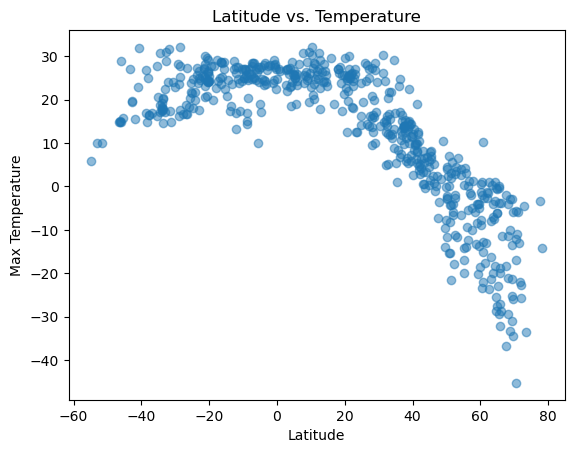

In [43]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
temp = city_data_df["Max Temp"]

plt.scatter(lat, temp, alpha=0.5)

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Save the figure
# plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

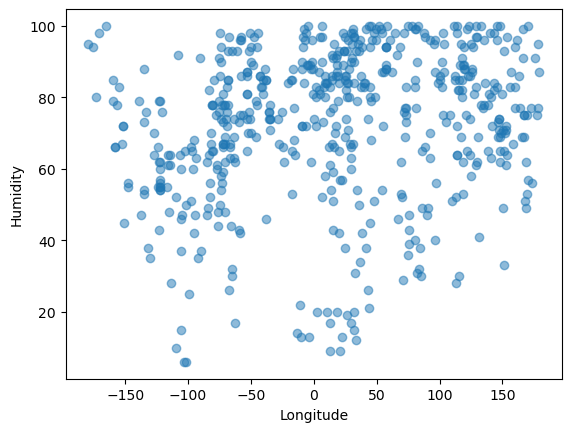

In [44]:
# Build the scatter plots for latitude vs. humidity
longitude = city_data_df["Lng"]
humidity = city_data_df["Humidity"]

plt.scatter(longitude, humidity, alpha=0.5)

# Incorporate the other graph properties
plt.xlabel('Longitude')
plt.ylabel('Humidity')

# Save the figure
# plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

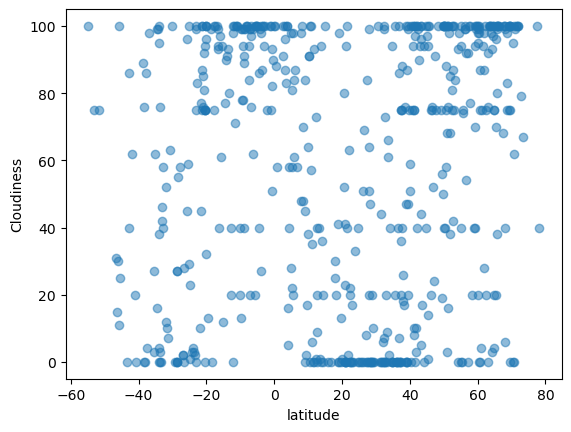

In [45]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df["Lat"]
Cloudiness = city_data_df["Cloudiness"]

plt.scatter(latitude, Cloudiness, alpha=0.5)

# Incorporate the other graph properties
plt.xlabel('latitude')
plt.ylabel('Cloudiness')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
# plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [ ]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE